## Unsupervised Learning 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Mall_Customers.csv")
df

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


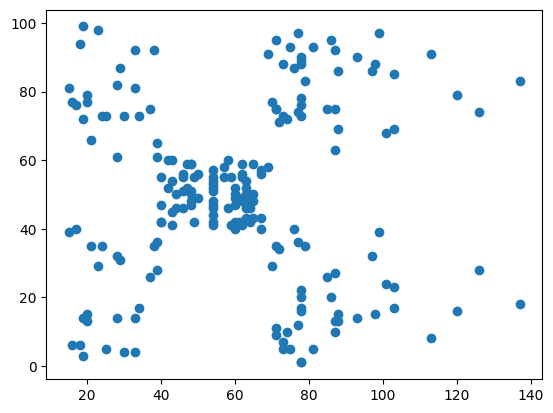

In [4]:
plt.scatter(df.iloc[:,1],
            df.iloc[:,2])

{'whiskers': [<matplotlib.lines.Line2D at 0x2741d0ae9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2741d107890>,
 'boxes': [<matplotlib.lines.Line2D at 0x2741af12650>],
 'medians': [<matplotlib.lines.Line2D at 0x2741d13f150>],
 'fliers': [<matplotlib.lines.Line2D at 0x2741d13c250>],
 'means': []}

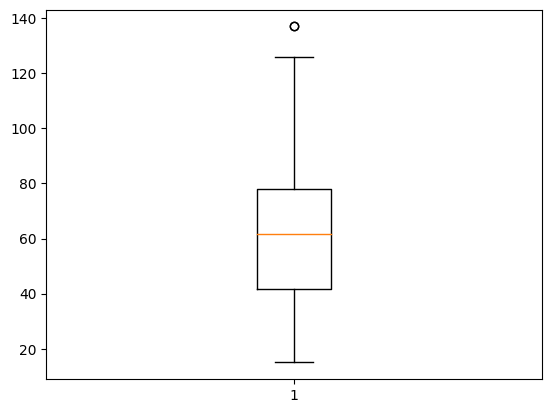

In [5]:
plt.boxplot(df['Annual Income (k$)'])

In [6]:
df.describe()

,CustomerID,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000
std,57.879185,26.264721,25.823522
min,1.000000,15.000000,1.000000
25%,50.750000,41.500000,34.750000
50%,100.500000,61.500000,50.000000
75%,150.250000,78.000000,73.000000
max,200.000000,137.000000,99.000000


In [7]:
Iqr=np.percentile(df["Annual Income (k$)"],75)-np.percentile(df["Annual Income (k$)"],25)
Ub=round(np.percentile(df["Annual Income (k$)"],75) + 1.5*Iqr)
mask = df["Annual Income (k$)"]<Ub
df[mask]

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
193,194,113,91
194,195,120,16
195,196,120,79
196,197,126,28


In [8]:
df_new=df[mask]

### The Elbow Method

In [9]:
from sklearn.cluster import KMeans

In [10]:
#with in the cluster sum of square
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters = i)
    model.fit(df_new.iloc[:,1:].values)
    #inertia_ attribute is wcss
    wcss.append(model.inertia_)


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12')])

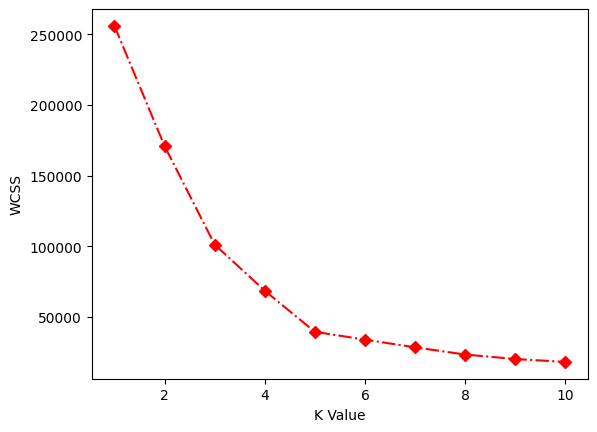

In [11]:
plt.plot(range(1,11),wcss,marker='D',ls='-.',color='red')
plt.xlabel("K Value")
plt.ylabel('WCSS')
plt.xticks()

In [12]:
model=KMeans(n_clusters=5)
model.fit(df_new.iloc[:,1:].values)

KMeans(n_clusters=5)

In [13]:
model.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [14]:
model.cluster_centers_

array([[55.0875    , 49.7125    ],
       [86.34285714, 17.57142857],
       [85.21052632, 82.10526316],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

### Day 9

#### Hierarchical Classification

In [15]:
import scipy.cluster.hierarchy as sch

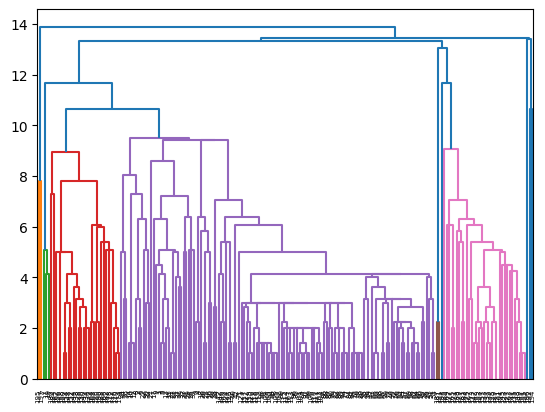

In [16]:
result=sch.dendrogram(sch.linkage(df_new.iloc[:,1:].values))

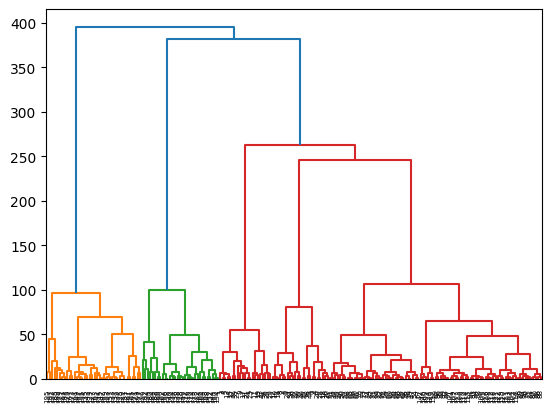

In [17]:
result=sch.dendrogram(sch.linkage(df_new.iloc[:,1:].values,method='ward'))

In [18]:
from sklearn.cluster import AgglomerativeClustering

#Bottom up approch

model=AgglomerativeClustering(n_clusters=5,
                              affinity='euclidean')

cluster=model.fit_predict(df_new.iloc[:,1:].values)

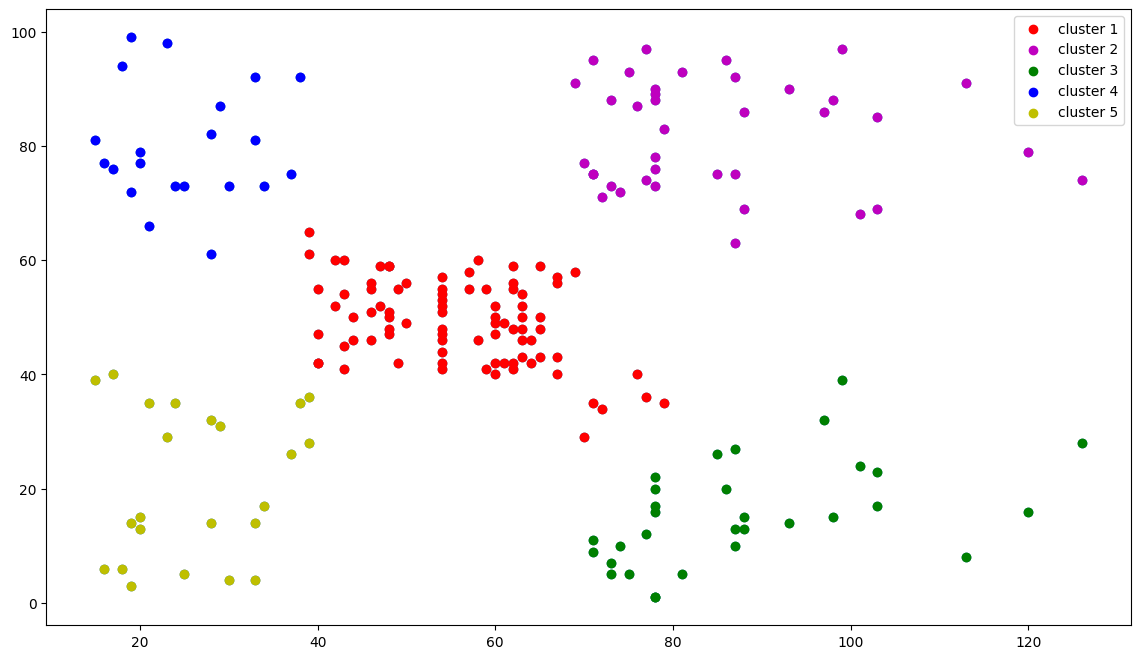

In [19]:
plt.figure(figsize=(14,8))
plt.scatter(df_new.iloc[:,1],df_new.iloc[:,2])
plt.scatter(df_new.iloc[cluster==0,1],df_new.iloc[cluster==0,2],color='r',label='cluster 1')
plt.scatter(df_new.iloc[cluster==1,1],df_new.iloc[cluster==1,2],color='m',label='cluster 2')
plt.scatter(df_new.iloc[cluster==2,1],df_new.iloc[cluster==2,2],color='g',label='cluster 3')
plt.scatter(df_new.iloc[cluster==3,1],df_new.iloc[cluster==3,2],color='b',label='cluster 4')
plt.scatter(df_new.iloc[cluster==4,1],df_new.iloc[cluster==4,2],color='y',label='cluster 5')

plt.legend()
plt.show()

### Wine

### Principle component Analysis 


its a dimentionality reduction technique


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Wine.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [23]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [24]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [25]:
from sklearn.decomposition import PCA

In [26]:
df['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [27]:
X=df.drop('Customer_Segment',axis=1)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc=StandardScaler()
X_sc=sc.fit_transform(X.values)

In [30]:
X_sc.shape

(178, 13)

In [31]:
model=PCA(n_components=2)
my_pca=model.fit_transform(X_sc)
my_pca.shape

(178, 2)

In [32]:
print(model.explained_variance_ratio_)
print(np.cumsum(model.explained_variance_ratio_))

[0.36198848 0.1920749 ]
[0.36198848 0.55406338]


In [33]:
model.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

In [34]:
#inverse the pca and geting the orignal data before scaling and PCA
X.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [35]:
#inverse to get back the columns

inverse_pca=model.inverse_transform(my_pca)
inverse_pca.shape

(178, 13)

In [36]:
# if we will not do this then output will be in e power something

np.set_printoptions(suppress=True)

In [37]:
#inverse to get back the data which was before scaling

inv_data_pca=sc.inverse_transform(inverse_pca)
inv_data_pca[:,2:]

array([[   2.48946863,   16.80065951,  112.60896689, ...,    1.08989027,
           3.32690688, 1210.95737839],
       [   2.33644939,   17.74580798,  102.78701408, ...,    1.12809399,
           3.23894658,  907.64501949],
       [   2.45426593,   17.45279154,  109.2315796 , ...,    1.06202759,
           3.16186353, 1091.67360962],
       ...,
       [   2.60674794,   21.53174996,  106.10827432, ...,    0.60062856,
           1.57697212,  822.12766064],
       [   2.56650246,   21.3163197 ,  104.7182021 , ...,    0.64979991,
           1.70841143,  795.19790435],
       [   2.60773936,   21.9545974 ,  105.06882747, ...,    0.5642122 ,
           1.43464165,  775.23937838]])

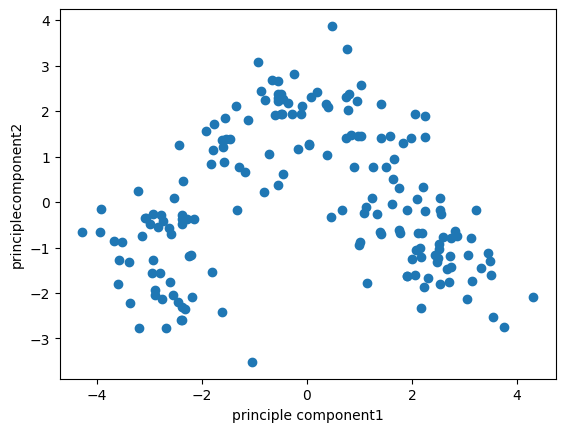

In [38]:
plt.scatter(my_pca[:,0],my_pca[:,1])
plt.xlabel("principle component1")
plt.ylabel("principlecomponent2")
plt.show()

In [39]:
colors=df['Customer_Segment']
colors.shape

(178,)

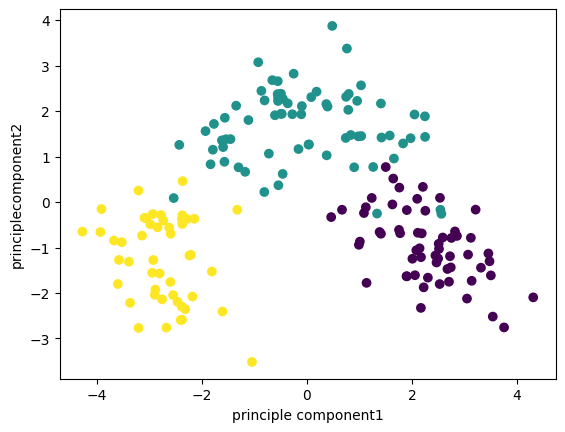

In [40]:
plt.scatter(my_pca[:,0],my_pca[:,1],c=colors)
plt.xlabel("principle component1")
plt.ylabel("principlecomponent2")
plt.show()

In [41]:
from sklearn.svm import SVC

In [42]:
svcmodel=SVC()
svcmodel.fit(my_pca,colors).score(my_pca,colors)

0.9719101123595506

In [43]:
# changing 1d array to 2d array

test_instance=np.array([14,2,2.2,16,112.6,3.1,3.42,0.24,2.2,6.5,1.09,3.4,1210.9]).reshape(-1,13)   # -1 will autoatically calculate the rows

In [44]:
X_s = sc.transform(test_instance)
X_s

array([[ 1.2345016 , -0.30192749, -0.60867587, -1.04947918,  0.90283311,
         1.28969686,  1.39624698, -0.98187536,  1.06719641,  0.62372704,
         0.58154421,  1.1134493 ,  1.47762656]])

In [45]:
#

sc_ti=sc.transform(test_instance)
sc_ti

array([[ 1.2345016 , -0.30192749, -0.60867587, -1.04947918,  0.90283311,
         1.28969686,  1.39624698, -0.98187536,  1.06719641,  0.62372704,
         0.58154421,  1.1134493 ,  1.47762656]])

In [46]:
test_pca=model.transform(sc_ti)
test_pca

array([[ 3.31977183, -1.23549823]])

In [47]:
test_pca.shape

(1, 2)

In [48]:
svcmodel.predict(test_pca)

array([1], dtype=int64)

### Time Stamp

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [88]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\tsdata.csv",index_col='date',parse_dates=True)


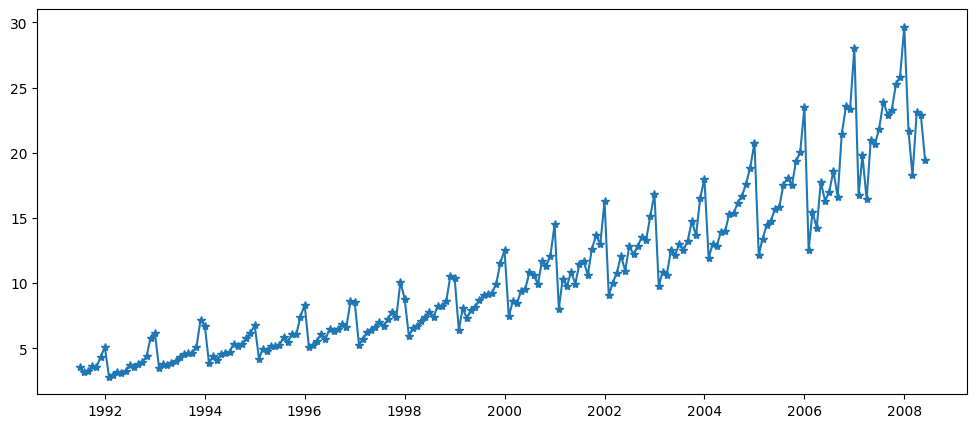

In [89]:
#plt.figure(figsize=())
plt.plot(df['value'],marker='*')

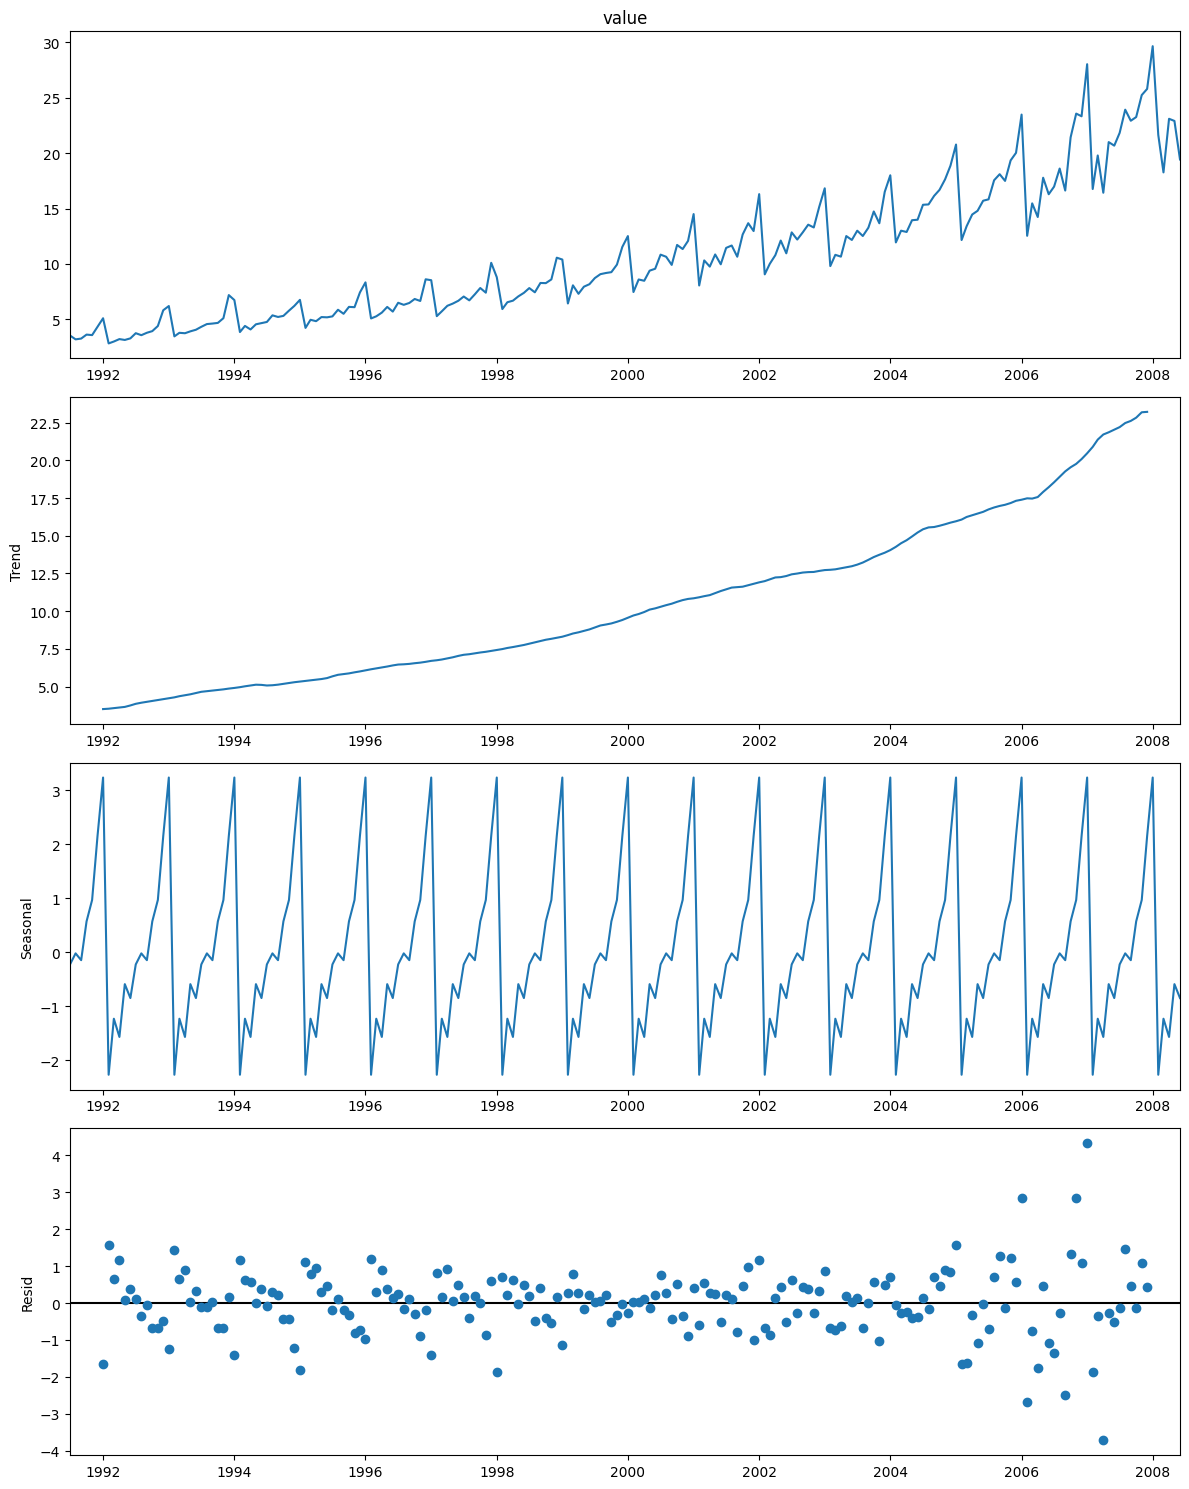

In [90]:
plt.rcParams.update({'figure.figsize':(12,15)})
result=seasonal_decompose(df['value'])
result.plot()
plt.show()

In [91]:
from statsmodels.tsa.stattools import adfuller

In [92]:
# The Argumented Dickey Fuller test canbe used to test time

results=adfuller(df['value'])
print('pvalues',results[1])


pvalues 1.0


In [93]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


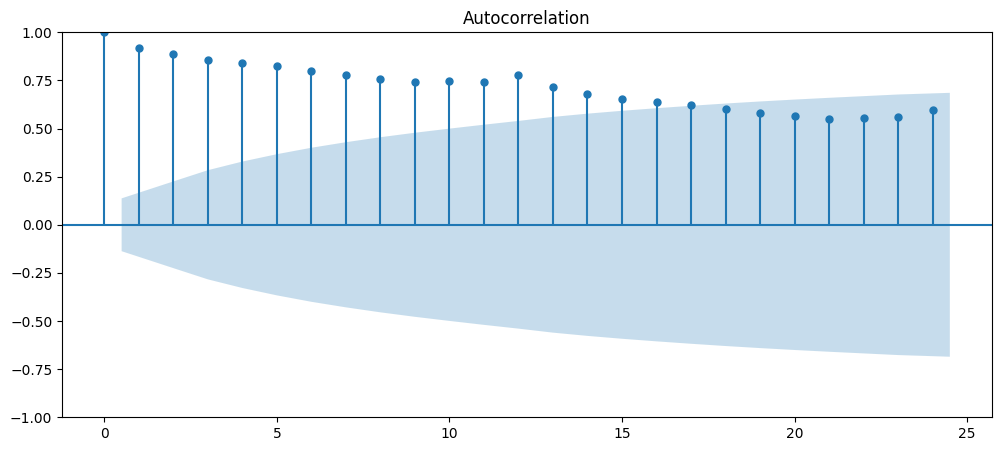

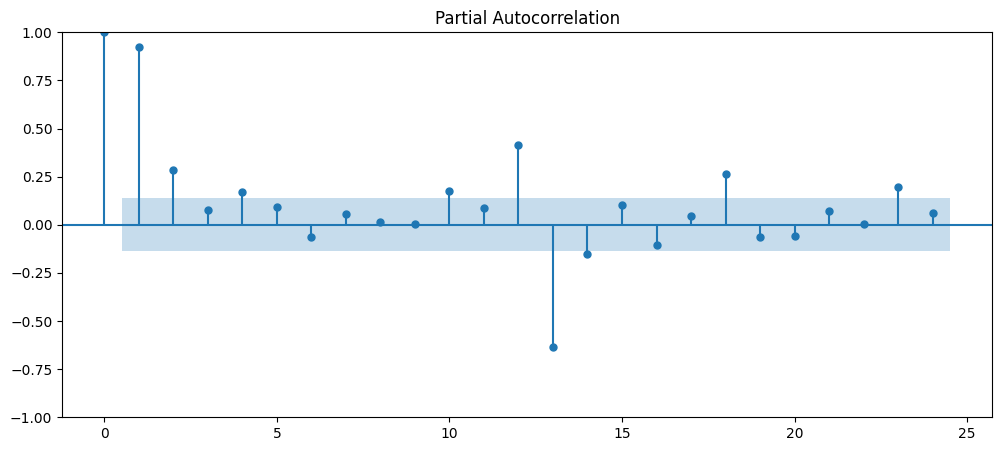

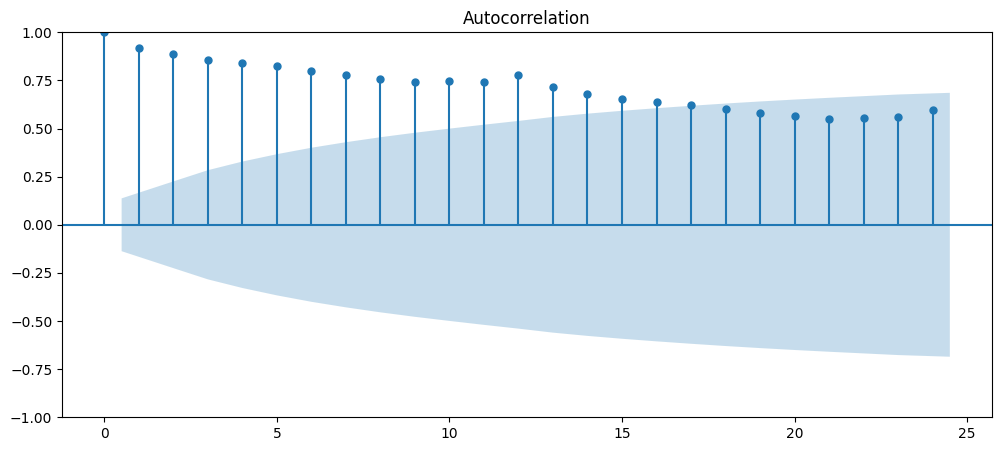

In [94]:
plt.rcParams.update({'figure.figsize':(12,5)})
#plot lags on the horizontal and the corelation on the vertical axis
#partial auto corelation funtion used to decide order of AR model
plot_pacf(df['value'])
#Auto corelation funtion used to deside order of ma model
plot_acf(df['value'])

In [95]:
from statsmodels.tsa.arima.model import ARIMA

In [96]:
#Autoregressive Integrated Moving Average ARIMA (p,d,q) Model

train_series=df.iloc[:163,0]
test_series=df.iloc[163:,0]

In [97]:
model=ARIMA(train_series,order=(1,1,1),freq='MS')
forecasted_model=model.fit

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [103]:
history=train_series.tolist()
prediction=[]
for v in test_series.tolist():
    #creating the model
    model=ARIMA(history,order=(2,1,15))
    forecasted_model=model.fit()
    #predicting 1st step at a time
    y_pred=forecasted_model.forecast(step=1)[0]
    #saving our prediction in a list
    prediction.append(y_pred)
    history.append(v)
    #adding in the training data one more data point
    #which is the actual observation of that day

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

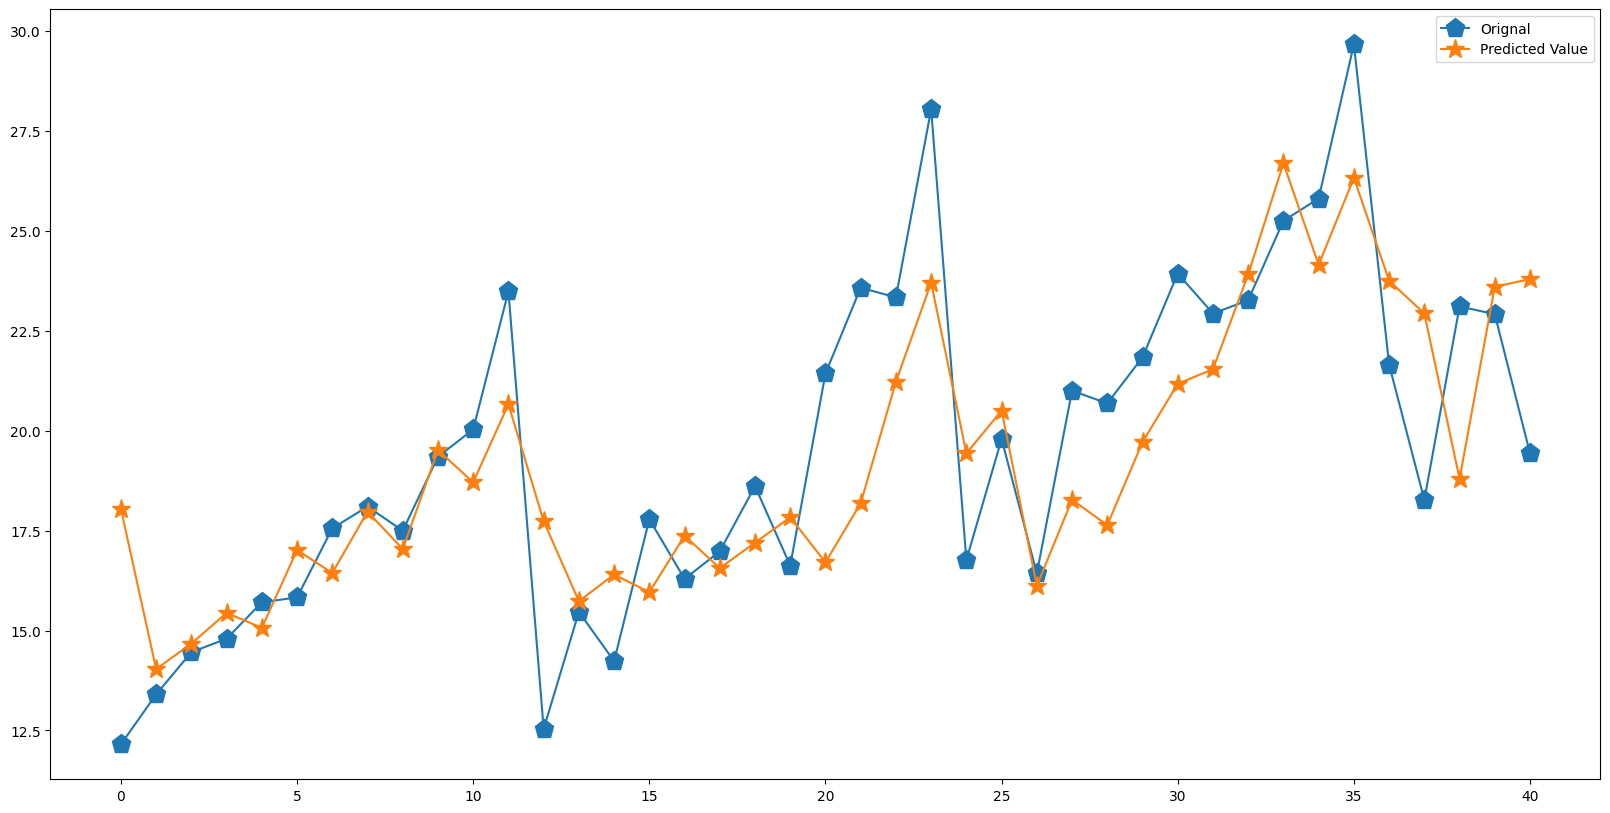

In [104]:
plt.figure(figsize=(20,10))
plt.plot(test_series.values,marker='p',ms=14,label='Orignal')
plt.plot(prediction,marker='*',ms=14,label='Predicted Value')
plt.legend()
plt.show()

In [101]:
history=train_series.tolist()
prediction=[]
for v in test_series.tolist():
    #creating the model
    model=ARIMA(history,order=(1,1,1))
    forecasted_model=model.fit()
    #predicting 1st step at a time
    y_pred=forecasted_model.forecast(step=1)[0]
    #saving our prediction in a list
    prediction.append(y_pred)
    history.append(v)
    #adding in the training data one more data point
    #which is the actual observation of that day

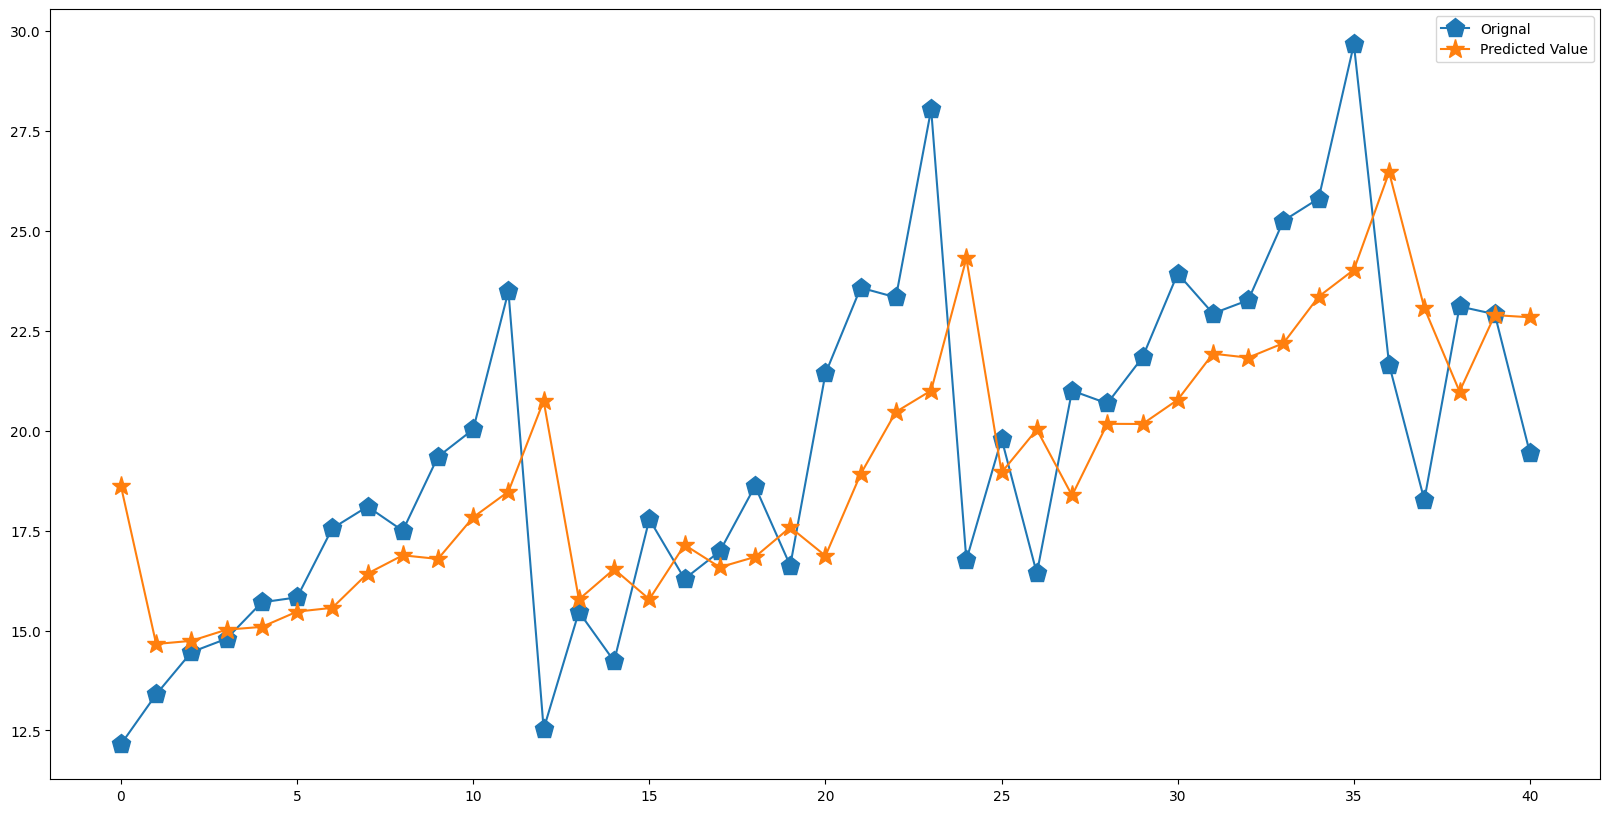

In [102]:
plt.figure(figsize=(20,10))
plt.plot(test_series.values,marker='p',ms=14,label='Orignal')
plt.plot(prediction,marker='*',ms=14,label='Predicted Value')
plt.legend()
plt.show()

### Sentimental Analysis

In [105]:
from textblob import TextBlob

In [129]:
text='What a beautiful flower!'
tb=TextBlob(text)

In [128]:
tb.sentiment    #value of polarity is -1 to 1 (sentiment) and value of sujectivity is 0 to 1 (Opinion)

Sentiment(polarity=1.0, subjectivity=1.0)

In [130]:
text='This is a very bad product!!'
tb=TextBlob(text)

In [131]:
tb.sentiment

Sentiment(polarity=-1.0, subjectivity=0.8666666666666667)

In [143]:
review=['What a disgusting product','I found this product helpful','What an amazing product','Packing was bad but product was useful']
sent=[]
for i in review:
    sent.append(TextBlob(i).sentiment)
    
sent

[Sentiment(polarity=-1.0, subjectivity=1.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.6000000000000001, subjectivity=0.9),
 Sentiment(polarity=-0.19999999999999993, subjectivity=0.3333333333333333)]

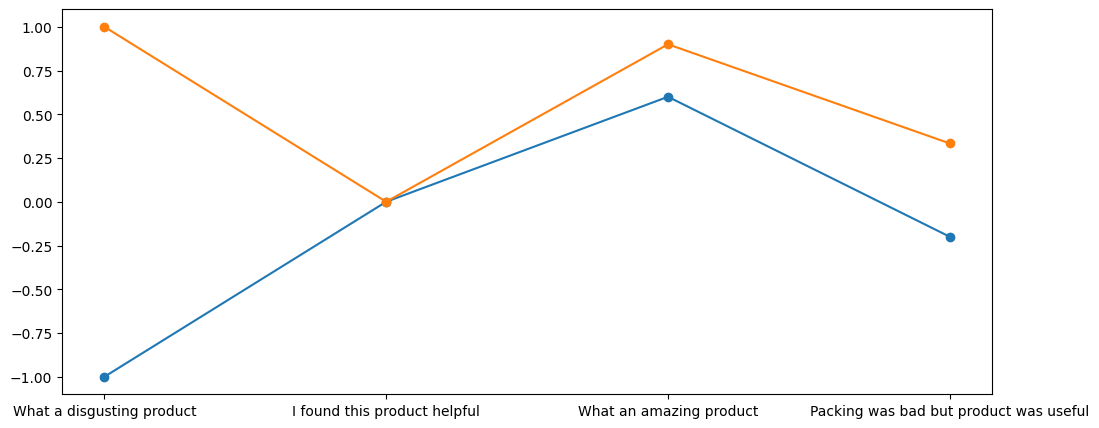

In [145]:
plt.plot(review,sent,marker='o')